In [1]:
import numpy as np
import matplotlib.pyplot as plt
from typing import List, Any, Dict
import requests
from bs4 import BeautifulSoup

In [2]:
def distance(a: np.array, b: np.array) -> np.array:
    return np.sqrt(np.sum(np.square(a-b), axis=-1))  # ???
a = distance(np.array([[0, 0], [0, 0], [2, 2]]),np.array([[1, 1], [2, 2], [5, 6]]))
print(a)

[1.41421356 2.82842712 5.        ]


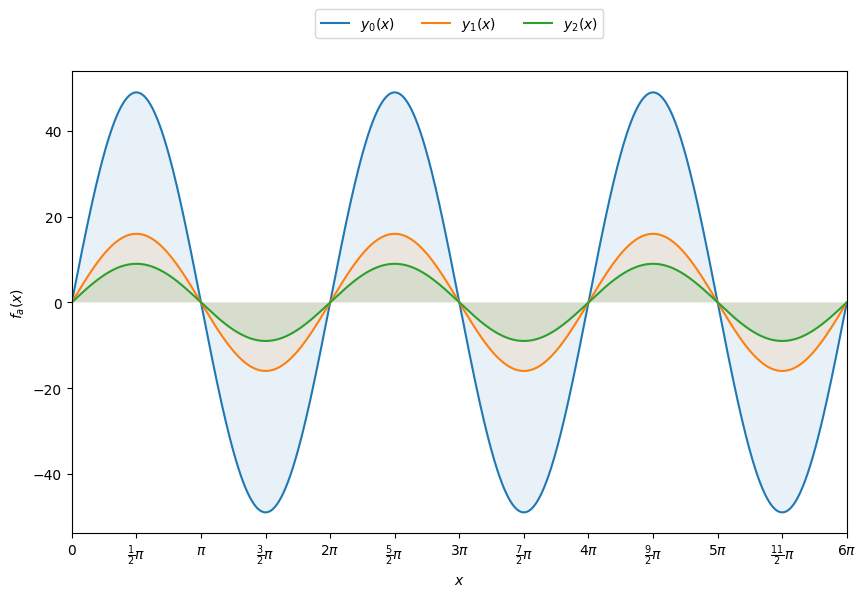

In [3]:
def generate_graph(a: List[float], show_figure: bool = False, save_path: str | None = None):
    
    def format_func(value, tick_number):
        '''
        Fromat an axis markings to the pi dimension
        '''
        N = int(np.round(2 * value / np.pi))
        if N == 0:
            return '0'
        if N == 2:
            return r'$\pi$'
        elif N % 2 == 0:
            return rf'${{{N//2}}}{{\pi}}$'
        else:
            return rf'$\frac{{{N}}}{{2}}{{\pi}}$' 
    
    def func(a, x):
        '''
        Mathematical implementation of target function
        '''
        a_np = np.array(a).reshape(-1, 1)  # rechape for broadcast
        y = (a_np*a_np)*np.sin(x)
        return y
    # math part
    x = np.linspace(0, 6*np.pi, 1000)
    y = func(a, x) 
    
    # prepare display
    fig = plt.figure(figsize=(10,6))
    ax = fig.add_subplot()
    ax.plot()
    ax.set_xlim(0,6*np.pi)
    ax.xaxis.set_major_locator(plt.MultipleLocator(np.pi / 2))
    ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))
    ax.set_xlabel(r'$x$')
    ax.set_ylabel(r'$f_{a}(x)$')
    # plotting
    for i, _ in enumerate(a):
        ax.plot(x, y[i], label=rf'$y_{{{i}}}(x)$')
        ax.fill_between(x, y[i], alpha=0.1)
    # set legend position
    ax.legend(loc='upper center', ncol=len(a), bbox_to_anchor=(0.5, 1.15))
    
    # postprocessing
    if save_path:
        plt.savefig(save_path)
    if show_figure:
        plt.show()
    
    plt.close(fig)

generate_graph([7, 4, 3], True, 'image1.png')

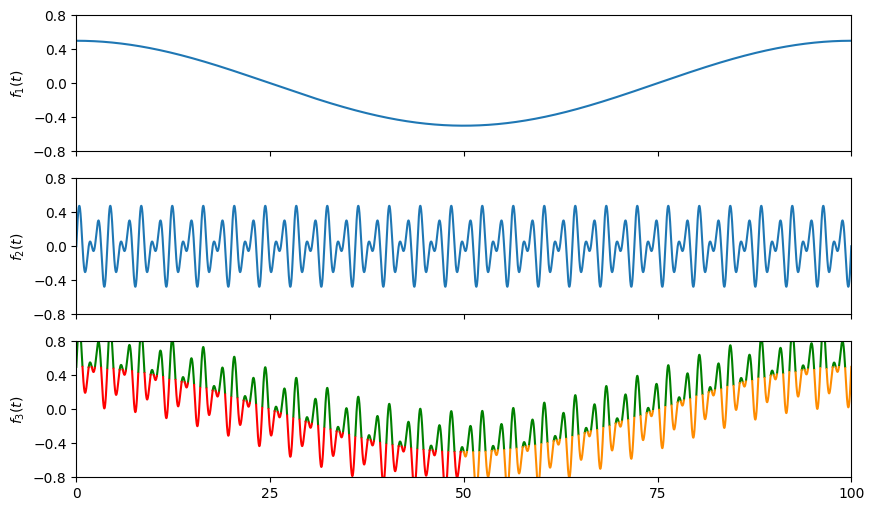

In [4]:
def generate_sinus(show_figure: bool = False, save_path: str | None = None)->None:
    def func1(t:np.array)->np.array:
        '''
        Implementation of math function by 1
        Params:
        t: [np.array]: input time series
        Returm:
        [np.array]: time series by function
        '''
        y = 0.5*np.cos(np.pi*t/50)
        return y
    def func2(t:np.array)->np.array:
        '''
        Implementation of math function by 1
        Params:
        t: [np.array]: input time series
        Returm:
        [np.array]: time series by function
        '''
        sin_sum = np.sin(np.pi*t)+np.sin(3*np.pi*t/2)
        y = 0.25*sin_sum
        return y
    # math part
    X_START = 0
    X_STOP = 100
    x = np.linspace(X_START, X_STOP, 10000)
    
    y1 = func1(x)
    y2 = func2(x)
    y3 = y1+y2
    y_base = [y1, y2]
    y3_not_green = np.ma.masked_where(y3 >= y1, y3)
    y3_green = np.ma.masked_where(y3 < y1, y3)
    x3_red = np.where(x < 50)[0]
    x3_orange = np.where(x >= 50)[0]
    # display
    fig, axs = plt.subplots(3, 1, figsize=(10,6))
    for i, ax in enumerate(axs):
        ax.set_xlim(0, 100)
        ax.xaxis.set_major_locator(plt.MultipleLocator(25))
        ax.set_ylabel(rf'$f_{{{i+1}}}(t)$')
        ax.set_ylim(-0.8, 0.8)
        ax.yaxis.set_major_locator(plt.MultipleLocator(0.4))
        if i < 2:
            ax.tick_params(axis='x', labelbottom=False, labeltop=False)
            ax.plot(x, y_base[i])
        else:
            ax.tick_params(axis='x', labelbottom=True, labeltop=False)
            ax.plot(x, y3_green, color='green')
            ax.plot(x[:len(x)//2],y3_not_green[:len(x)//2], color='red')
            ax.plot(x[len(x)//2:], y3_not_green[len(x)//2:], color='darkorange')
            
    if save_path:
        plt.savefig(save_path)
    if show_figure:
        plt.show()
    
    plt.close()


generate_sinus(True, 'image2.png')
    

In [97]:
def download_data() -> Dict[str, List[Any]]:
    coord_to_float = lambda x: float(x[:-1].replace(',', '.'))
    nums_without_wh_sp = lambda x: float(''.join(ch for ch in x if ch.isdigit() or ch in ',.').replace(',', '.'))
    URL_TABLE = 'https://ehw.fit.vutbr.cz/izv/st_zemepis_cz.html'
    response = requests.get(URL_TABLE)
    if response.status_code != 200:
        return dict()
    soup = BeautifulSoup(response.content, 'html.parser')
    out = {'positions':[], 'lats': [], 'longs': [], 'heights':[]}
    table = soup.find_all('table')[-1].find_all('tr')[1:]
    for line in table:
        subinfo = line.find_all('td')[::2]
        out['positions'].append( subinfo[0].find('strong').text)
        out['lats'].append(coord_to_float(subinfo[1].text))
        out['longs'].append(coord_to_float(subinfo[2].text))
        out['heights'].append(nums_without_wh_sp(subinfo[3].text))
    print(out)
download_data()


{'positions': ['Cheb', 'Karlovy Vary', 'Přimda', 'Kopisty', 'Tušimice', 'Plzeň-Mikulka', 'Churáňov', 'Milešovka', 'Kocelovice', 'Ústí nad Labem', 'Doksany', 'Praha-Ruzyně', 'Praha-Karlov', 'Praha-Libuš', 'Temelín', 'České Budějovice', 'Praha-Kbely', 'Liberec', 'Jičín', 'Čáslav', 'Košetice', 'Kostelní Myslová', 'Pec pod Sněžkou', 'Pardubice', 'Přibyslav', 'Polom', 'Ústí nad Orlicí', 'Svratouch', 'Náměšť nad Oslavou', 'Dukovany', 'Kuchařovice', 'Luká', 'Brno-Tuřany', 'Šerák', 'Prostějov', 'Červená u Libavé', 'Holešov', 'Ostrava-Mošnov', 'Lysá hora', 'Maruška'], 'lats': [50.0683, 50.2016, 49.6694, 50.544, 50.3765, 49.7645, 49.0683, 50.5549, 49.4672, 50.6833, 50.4587, 50.1003, 50.0691, 50.0077, 49.1975, 48.9519, 50.1232, 50.7697, 50.4393, 49.9407, 49.5735, 49.159, 50.6918, 50.0158, 49.5825, 50.3503, 49.9801, 49.735, 49.1708, 49.0954, 48.8809, 49.6522, 49.153, 50.1874, 49.4525, 49.777, 49.3205, 49.6918, 49.5459, 49.365], 'longs': [12.3913, 12.9139, 12.6779, 13.6227, 13.3279, 13.3787, 13.615